# Exercise

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
n_node = 100
n_layer = 20

### 20 layers with 100 nodes

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 3)))
model.add(layers.Flatten())

for i in range(n_layer):
    model.add(layers.Dense(n_node, kernel_initializer='he_uniform', activation='elu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3)

model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=32,
          epochs=100,
          callbacks=[earlystopping_cb])

Epoch 1/100
1250/1250 [==============================] - 15s 8ms/step - loss: 4.7730 - acc: 0.1747 - val_loss: 2.1503 - val_acc: 0.2092
Epoch 2/100
1250/1250 [==============================] - 9s 8ms/step - loss: 2.0517 - acc: 0.2427 - val_loss: 1.9832 - val_acc: 0.2599
Epoch 3/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9280 - acc: 0.2917 - val_loss: 1.9350 - val_acc: 0.2838
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8546 - acc: 0.3251 - val_loss: 1.8288 - val_acc: 0.3375
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7974 - acc: 0.3435 - val_loss: 1.7874 - val_acc: 0.3519
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7477 - acc: 0.3641 - val_loss: 1.7409 - val_acc: 0.3724
Epoch 7/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7068 - acc: 0.3774 - val_loss: 1.7173 - val_acc: 0.3874
Epoch 8/100
1250/1250 [==========================

### add batch normalization

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32, 32, 3)))
model.add(layers.Flatten())

for i in range(n_layer):
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(n_node, kernel_initializer='he_uniform', activation='elu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3)

model.fit(x_train, y_train,
          validation_data=(x_val, y_val),
          batch_size=32,
          epochs=100,
          callbacks=[earlystopping_cb])

Epoch 1/100
1250/1250 [==============================] - 27s 17ms/step - loss: 2.1658 - acc: 0.2381 - val_loss: 1.8623 - val_acc: 0.3274
Epoch 2/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.8476 - acc: 0.3327 - val_loss: 1.7361 - val_acc: 0.3731
Epoch 3/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.7594 - acc: 0.3673 - val_loss: 1.6705 - val_acc: 0.4012
Epoch 4/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.7018 - acc: 0.3877 - val_loss: 1.6162 - val_acc: 0.4254
Epoch 5/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6545 - acc: 0.4077 - val_loss: 1.5783 - val_acc: 0.4350
Epoch 6/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6120 - acc: 0.4261 - val_loss: 1.5365 - val_acc: 0.4579
Epoch 7/100
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5717 - acc: 0.4390 - val_loss: 1.5216 - val_acc: 0.4611
Epoch 8/100
1250/1250 [==================

### self-normalize model

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train.reshape(-1, 32 * 32 * 3))
x_val_norm = scaler.transform(x_val.reshape(-1, 32 * 32 * 3))
x_test_norm = scaler.transform(x_test.reshape(-1, 32 * 32 * 3))

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32 * 32 * 3)))
model.add(layers.Flatten())

for i in range(n_layer):
    model.add(layers.Dense(n_node, kernel_initializer='lecun_normal', activation='selu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3)

model.fit(x_train_norm ,y_train,
          validation_data=(x_val_norm, y_val),
          batch_size=32,
          epochs=100,
          callbacks=[earlystopping_cb])

Epoch 1/100
1250/1250 [==============================] - 22s 15ms/step - loss: 1.8431 - acc: 0.3415 - val_loss: 1.6969 - val_acc: 0.3930
Epoch 2/100
1250/1250 [==============================] - 18s 15ms/step - loss: 1.6235 - acc: 0.4178 - val_loss: 1.5979 - val_acc: 0.4333
Epoch 3/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.5256 - acc: 0.4565 - val_loss: 1.5777 - val_acc: 0.4385
Epoch 4/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.4494 - acc: 0.4854 - val_loss: 1.5352 - val_acc: 0.4551
Epoch 5/100
1250/1250 [==============================] - 18s 15ms/step - loss: 1.3909 - acc: 0.5052 - val_loss: 1.5237 - val_acc: 0.4614
Epoch 6/100
1250/1250 [==============================] - 18s 15ms/step - loss: 1.3324 - acc: 0.5247 - val_loss: 1.4871 - val_acc: 0.4767
Epoch 7/100
1250/1250 [==============================] - 18s 14ms/step - loss: 1.2799 - acc: 0.5441 - val_loss: 1.4778 - val_acc: 0.4840
Epoch 8/100
1250/1250 [==================

### add dropout

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32 * 32 * 3)))
model.add(layers.Flatten())

for i in range(n_layer):
    model.add(layers.Dropout(0.2 * (i*i)/(n_layer*n_layer)))
    model.add(layers.Dense(n_node, kernel_initializer='lecun_normal', activation='selu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3)

model.fit(x_train_norm ,y_train,
          validation_data=(x_val_norm, y_val),
          batch_size=32,
          epochs=100,
          callbacks=[earlystopping_cb])

Epoch 1/100
1250/1250 [==============================] - 24s 16ms/step - loss: 2.2811 - acc: 0.2170 - val_loss: 1.8765 - val_acc: 0.3387
Epoch 2/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.9498 - acc: 0.2970 - val_loss: 1.7755 - val_acc: 0.3649
Epoch 3/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.8132 - acc: 0.3443 - val_loss: 1.7268 - val_acc: 0.3932
Epoch 4/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7300 - acc: 0.3817 - val_loss: 1.6675 - val_acc: 0.4238
Epoch 5/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6584 - acc: 0.4126 - val_loss: 1.6289 - val_acc: 0.4303
Epoch 6/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6066 - acc: 0.4341 - val_loss: 1.6081 - val_acc: 0.4410
Epoch 7/100
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5564 - acc: 0.4538 - val_loss: 1.5841 - val_acc: 0.4503
Epoch 8/100
1250/1250 [==================

In [ ]:
# MC Dropout

y_probas = np.stack([model(x_val_norm, training=True) for sample in range(1000)])
y_proba = y_probas.mean(axis=0)

y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_val.reshape(-1)) / len(y_val)

print(f'acc: {accuracy}')

acc: 0.489


In [ ]:
#@title 1Cycle Scheduler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging

logging.getLogger('tensorflow').setLevel(logging.ERROR)

from tensorflow.keras.callbacks import Callback

class CosineAnnealer:
    
    def __init__(self, start, end, steps):
        self.start = start
        self.end = end
        self.steps = steps
        self.n = 0
        
    def step(self):
        self.n += 1
        cos = np.cos(np.pi * (self.n / self.steps)) + 1
        return self.end + (self.start - self.end) / 2. * cos


class OneCycleScheduler(Callback):
    """ 
C
a
l
l
b
a
c
k
 that schedules the learning rate on a 1cycle policy as per Leslie Smith's paper(https://arxiv.org/pdf/1803.09820.pdf).
    If the model supports a momentum parameter, it will also be adapted by the schedule.
    The implementation adopts additional improvements as per the fastai library: https://docs.fast.ai/callbacks.one_cycle.html, where
    only two phases are used and the adaptation is done using cosine annealing.
    In phase 1 the LR increases from 
l
r
max
÷
f
a
c
→
r
 to 
l
r
max
 and momentum decreases from 
m
o
m
max
 to 
m
o
m
min
.
    In the second phase the LR decreases from 
l
r
max
 to 
l
r
max
÷
f
a
c
→
r
⋅
1
e
4
 and momemtum from 
m
o
m
max
 to 
m
o
m
min
.
    By default the phases are not of equal length, with the phase 1 percentage controlled by the parameter 
p
h
a
s
e
1
_
p
c
t
.
    """

    def __init__(self, lr_max, steps, mom_min=0.85, mom_max=0.95, phase_1_pct=0.3, div_factor=25.):
        super(OneCycleScheduler, self).__init__()
        lr_min = lr_max / div_factor
        final_lr = lr_max / (div_factor * 1e4)
        phase_1_steps = steps * phase_1_pct
        phase_2_steps = steps - phase_1_steps
        
        self.phase_1_steps = phase_1_steps
        self.phase_2_steps = phase_2_steps
        self.phase = 0
        self.step = 0
        
        self.phases = [[CosineAnnealer(lr_min, lr_max, phase_1_steps), CosineAnnealer(mom_max, mom_min, phase_1_steps)], 
                 [CosineAnnealer(lr_max, final_lr, phase_2_steps), CosineAnnealer(mom_min, mom_max, phase_2_steps)]]
        
        self.lrs = []
        self.moms = []

    def on_train_begin(self, logs=None):
        self.phase = 0
        self.step = 0

        self.set_lr(self.lr_schedule().start)
        self.set_momentum(self.mom_schedule().start)
        
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

    def on_train_batch_end(self, batch, logs=None):
        self.step += 1
        if self.step >= self.phase_1_steps:
            self.phase = 1
            
        self.set_lr(self.lr_schedule().step())
        self.set_momentum(self.mom_schedule().step())
        
    def get_lr(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.lr)
        except AttributeError:
            return None
        
    def get_momentum(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.momentum)
        except AttributeError:
            return None
        
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore
        
    def set_momentum(self, mom):
        try:
            tf.keras.backend.set_value(self.model.optimizer.momentum, mom)
        except AttributeError:
            pass # ignore

    def lr_schedule(self):
        return self.phases[self.phase][0]
    
    def mom_schedule(self):
        return self.phases[self.phase][1]
    
    def plot(self):
        ax = plt.subplot(1, 2, 1)
        ax.plot(self.lrs)
        ax.set_title('Learning Rate')
        ax = plt.subplot(1, 2, 2)
        ax.plot(self.moms)
        ax.set_title('Momentum')

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss") 
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [ ]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(32 * 32 * 3)))
model.add(layers.Flatten())

for i in range(n_layer):
    model.add(layers.Dense(n_node, kernel_initializer='lecun_normal', activation='selu'))

model.add(layers.AlphaDropout(0.1))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

313/313 [==============================] - 6s 10ms/step - loss: 7572920729600.0000 - acc: 0.1408


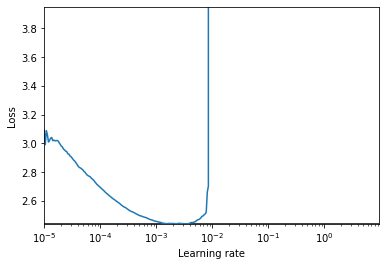

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, x_train_norm, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
batch_size=128
n_epochs=100

In [ ]:
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20)

lr_scheduler_cb = OneCycleScheduler(math.ceil(len(x_train_norm) / batch_size) * n_epochs, max_rate=0.05)

model.fit(x_train_norm ,y_train,
          validation_data=(x_val_norm, y_val),
          batch_size=batch_size,
          epochs=n_epochs,
          callbacks=[earlystopping_cb, lr_scheduler_cb])

Epoch 1/100
313/313 [==============================] - 5s 6ms/step - loss: 2.0844 - acc: 0.2776 - val_loss: 1.7961 - val_acc: 0.3663
Epoch 2/100
313/313 [==============================] - 2s 5ms/step - loss: 1.8234 - acc: 0.3560 - val_loss: 1.7281 - val_acc: 0.4008
Epoch 3/100
313/313 [==============================] - 2s 5ms/step - loss: 1.6991 - acc: 0.3976 - val_loss: 1.7240 - val_acc: 0.4104
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 1.6160 - acc: 0.4250 - val_loss: 1.6723 - val_acc: 0.4220
Epoch 5/100
313/313 [==============================] - 2s 5ms/step - loss: 1.5441 - acc: 0.4507 - val_loss: 1.6155 - val_acc: 0.4380
Epoch 6/100
313/313 [==============================] - 2s 5ms/step - loss: 1.4922 - acc: 0.4703 - val_loss: 1.6067 - val_acc: 0.4430
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 1.4437 - acc: 0.4891 - val_loss: 1.6057 - val_acc: 0.4483
Epoch 8/100
313/313 [==============================] - 2s 5ms/step - 

# VGG Blocks

In [ ]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

x_train_scaled, x_val_scaled = x_train, x_val

datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = datagen.flow(x_train_scaled, y_train, batch_size=batch_size)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
# compile model
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_42 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_43 (ReLU)              (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1250/1250 [==============================] - 38s 30ms/step - loss: 22.8718 - accuracy: 0.1871


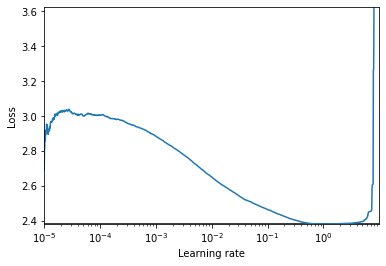

In [ ]:
batch_size = 32
rates, losses = find_learning_rate(model, x_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
n_epochs = 100
batch_size = 32

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20)

lr_scheduler_cb = OneCycleScheduler(math.ceil(len(x_train_scaled) / batch_size) * n_epochs, max_rate=1e-3)

model.fit(train_generator,
          validation_data=(x_val_scaled, y_val),
          batch_size=batch_size,
          epochs=n_epochs,
          callbacks=[earlystopping_cb, tensorboard_callback])

Epoch 1/100
1250/1250 [==============================] - 42s 33ms/step - loss: 2.0008 - accuracy: 0.2816 - val_loss: 1.7816 - val_accuracy: 0.3387
Epoch 2/100
1246/1250 [============================>.] - ETA: 0s - loss: 1.9253 - accuracy: 0.2968

In [ ]:
%tensorboard --logdir logs

In [ ]:
y_probas = np.stack([model(x_val, training=True) for sample in range(1000)])
y_proba = y_probas.mean(axis=0)

y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_val.reshape(-1)) / len(y_val)

print(f'acc: {accuracy}')